# COMP 4151 - Assignment 6

## Due: 11/7/2019 at 11:59PM

## Name:

**Note**: 

- All work in this assignment must be done, created, originated from each student. 
- All external assistance must be explicitly mentioned and cited. 
- Using work done by others without explicit citation is considered cheating. 
- A student will receive a zero grade on the assignment for cheating. 
- Repeated offence will lead to additional consequences.

### Overview

The goal of this assignment is to make sure that you can reason with data.  Although each question appears to be simple, your answer should be clear and substantiated with actual code.

Your answer will be grade based on how complete and thorough it is.  It should first explain in English your reasoning.  It should also be substantiated with code that follows your reasoning that is described in English.


### Dataset
The dataset to be used is: https://umdrive.memphis.edu/vphan/public/4151/diabetes.csv

More information about this dataset can be found here: https://datahub.io/machine-learning/diabetes#readme

In this dataset, the Outcome column has two values 1, which means that the person has diabetes, and 0, which means the person does not have diabetes.

The rest of the columns are attributes that might contribute to a person having or not having diabetes.

In [1]:
import pandas
df = pandas.read_csv('/Users/XinJu/Desktop/Fall 2019/COMP 4151/Datasets/diabetes.csv')

In [2]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**Question 1** (25 points)

Is there a strong **linear** relationship between any two attributes that might contribute to diabetes in this dataset?

Substantiate your answer to this question as much as possible.

Answer: There does not appear to be a strong linear relationship (linear correlation) between any of the attribute pairs. However, there may be a very slight postive correlation between Pregnancies and Age due to their relatively high linear regression cross validation average accuracy score (0.28); between 
SkinThickness and Insulin (average accuracy score = 0.19); between SkinThickness and BMI (average accuracy score = 0.13); and between Glucose and Insulin (average accuracy score = 0.10). 

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate, KFold
from sklearn.model_selection import ShuffleSplit
import seaborn
from matplotlib import pyplot
#!pip install statsmodels

In [6]:
#Iterate through all possible combinations of attributes, Create Linear Regression Models, and test Accuracy of models
for col1 in range(0, 8):
    col1 = col1
    for col2 in range(col1 + 1,8):
        print(df.columns[col1], ' vs. ', df.columns[col2],':')
        col1_name = df.columns[col1]
        col2_name = df.columns[col2]
        X = df[[col1_name]] #Set predictor attribute
        y = df[col2_name]   #Set response attribute
        model = LinearRegression()
        result = cross_validate(model, X, y, cv = 10)
        #result = cross_validate(model, X, y, cv=ShuffleSplit(n_splits=10))
        print('average accuracy:', result['test_score'].mean()) #Find average accuracy between attributes 1 and 2
        print('') #Space

Pregnancies  vs.  Glucose :
average accuracy: -0.007901501910223962

Pregnancies  vs.  BloodPressure :
average accuracy: 0.009335349817494043

Pregnancies  vs.  SkinThickness :
average accuracy: -0.006007301061648795

Pregnancies  vs.  Insulin :
average accuracy: -0.0005986977179332387

Pregnancies  vs.  BMI :
average accuracy: -0.019422097150405236

Pregnancies  vs.  DiabetesPedigreeFunction :
average accuracy: -0.01910842029539601

Pregnancies  vs.  Age :
average accuracy: 0.28907717507199127

Glucose  vs.  BloodPressure :
average accuracy: 0.013053462290054153

Glucose  vs.  SkinThickness :
average accuracy: -0.01034498384457

Glucose  vs.  Insulin :
average accuracy: 0.1012979781469792

Glucose  vs.  BMI :
average accuracy: 0.0270577793471782

Glucose  vs.  DiabetesPedigreeFunction :
average accuracy: 5.3745308107111535e-05

Glucose  vs.  Age :
average accuracy: 0.05814693870929831

BloodPressure  vs.  SkinThickness :
average accuracy: 0.03490207218695376

BloodPressure  vs.  Insul

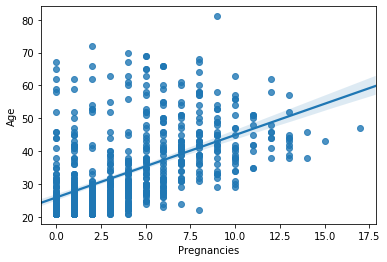

In [76]:
seaborn.regplot(x='Pregnancies', y='Age', data=df, logistic=False)

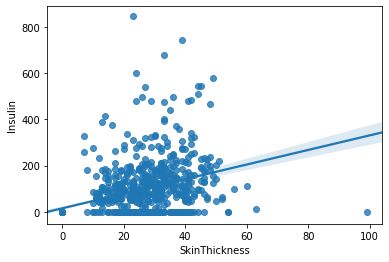

In [77]:
seaborn.regplot(x='SkinThickness', y='Insulin', data=df, logistic=False)

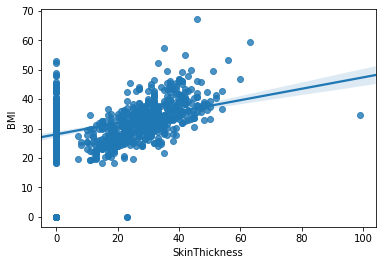

In [78]:
seaborn.regplot(x='SkinThickness', y='BMI', data=df, logistic=False)

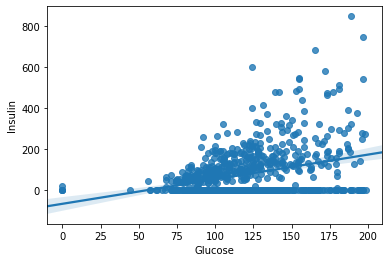

In [79]:
seaborn.regplot(x='Glucose', y='Insulin', data=df, logistic=False)

**Question 2** (25 points)

Is there a strong **non-linear** relationship between any two attributes that might contribute to diabetes in this dataset?

Substantiate your answer to this question as much as possible.

Answer: There does not appear to be a strong linear relationship (linear correlation) between any of the attribute pairs. However, there may be a very slight postive correlation between Pregnancies and Age due to their relatively high linear regression cross validation average accuracy score (0.314); between 
SkinThickness and Insulin (average accuracy score = 0.205); and between SkinThickness and BMI (average accuracy score = 0.224).

In [54]:
from sklearn.tree import DecisionTreeRegressor

In [58]:
#Iterate through all possible combinations of attributes, Create Decision Tree Regression Models, and test Accuracy of models
for col1 in range(0, 8):
    col1 = col1
    for col2 in range(col1 + 1,8):
        print(df.columns[col1], ' vs. ', df.columns[col2],':')
        col1_name = df.columns[col1]
        col2_name = df.columns[col2]
        X = df[[col1_name]] #Set predictor attribute
        y = df[col2_name]   #Set response attribute
        model = DecisionTreeRegressor(max_depth= 3)
        result = cross_validate(model, X, y, cv = 10)
        print('average accuracy:', result['test_score'].mean()) #Find average accuracy between attributes 1 and 2
        print('') #Space

Pregnancies  vs.  Glucose :
average accuracy: 0.010703351073485556

Pregnancies  vs.  BloodPressure :
average accuracy: 0.011708566447472934

Pregnancies  vs.  SkinThickness :
average accuracy: -0.011589723911239946

Pregnancies  vs.  Insulin :
average accuracy: -0.010638687989462348

Pregnancies  vs.  BMI :
average accuracy: 0.0034578348487154338

Pregnancies  vs.  DiabetesPedigreeFunction :
average accuracy: -0.033114492343192456

Pregnancies  vs.  Age :
average accuracy: 0.3148895855488694

Glucose  vs.  BloodPressure :
average accuracy: 0.004650851348519081

Glucose  vs.  SkinThickness :
average accuracy: -0.02289748171195083

Glucose  vs.  Insulin :
average accuracy: 0.037601194630553704

Glucose  vs.  BMI :
average accuracy: -0.01015540502146137

Glucose  vs.  DiabetesPedigreeFunction :
average accuracy: -0.06003208180866495

Glucose  vs.  Age :
average accuracy: 0.035797025303488085

BloodPressure  vs.  SkinThickness :
average accuracy: 0.04261800988358011

BloodPressure  vs.  I

**Question 3** (25 points)

Based on this dataset, are these attributes good enough to predict diabetes?

Substantiate your answer to this question as much as possible.

Answer: Yes, each attribute appears to be a good predictor of the Outcome (all average accuracies > 0.50 so better than random guessing).

In [8]:
from sklearn.linear_model import LogisticRegression

In [75]:
#Examine relationship between each attribute and the response (using each attribute to predict the response)
for col1 in range(0, 8):
    col1 = col1
    col1_name = df.columns[col1]
    print(df.columns[col1], ' vs. ', df.columns[8] ,':')
    col1_name = df.columns[col1]
    col2_name = df.columns[8] #Outcome 
    X = df[[col1_name]] #Set predictor attribute
    y = df[col2_name]   #Set response attribute
    model1 = LogisticRegression(solver = 'lbfgs')
    #result = cross_validate(model, X, y, cv = 10)
    result = cross_validate(model1, X, y, cv=ShuffleSplit(n_splits=10))
    print('average accuracy (Logistic):', result['test_score'].mean()) #Find average accuracy between attributes 1 and 2
    print('average standard deviation (Logistic):', result['test_score'].std())
    print('') #Space

Pregnancies  vs.  Outcome :
average accuracy (Logistic): 0.687012987012987
average standard deviation (Logistic): 0.02355630798339878

Glucose  vs.  Outcome :
average accuracy (Logistic): 0.7454545454545454
average standard deviation (Logistic): 0.03494447804434731

BloodPressure  vs.  Outcome :
average accuracy (Logistic): 0.6532467532467533
average standard deviation (Logistic): 0.04997891273998406

SkinThickness  vs.  Outcome :
average accuracy (Logistic): 0.6558441558441559
average standard deviation (Logistic): 0.061534325924582536

Insulin  vs.  Outcome :
average accuracy (Logistic): 0.6376623376623377
average standard deviation (Logistic): 0.0567429929219571

BMI  vs.  Outcome :
average accuracy (Logistic): 0.6987012987012987
average standard deviation (Logistic): 0.04098632165729742

DiabetesPedigreeFunction  vs.  Outcome :
average accuracy (Logistic): 0.6688311688311688
average standard deviation (Logistic): 0.04655441124398683

Age  vs.  Outcome :
average accuracy (Logistic):

In [ ]:
import seaborn
#!pip install statsmodels

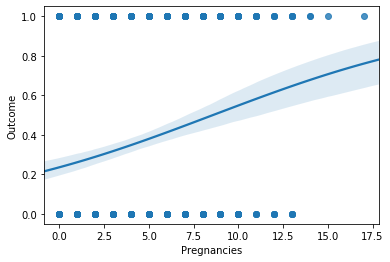

In [65]:
seaborn.regplot(x='Pregnancies', y='Outcome', data=df, logistic=True)

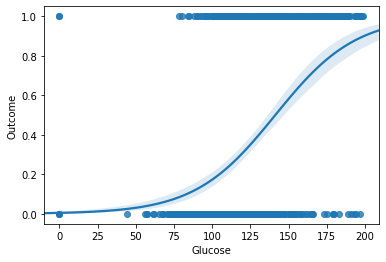

In [66]:
seaborn.regplot(x='Glucose', y='Outcome', data=df, logistic=True)

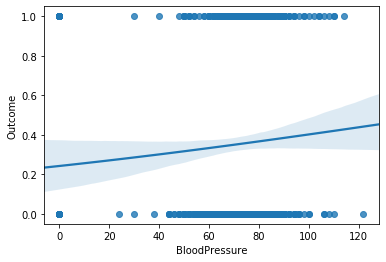

In [67]:
seaborn.regplot(x='BloodPressure', y='Outcome', data=df, logistic=True)

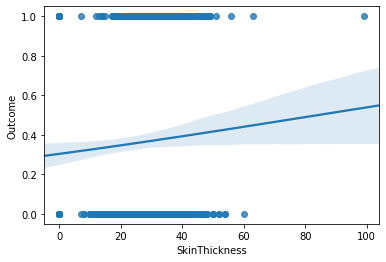

In [68]:
seaborn.regplot(x='SkinThickness', y='Outcome', data=df, logistic=True)

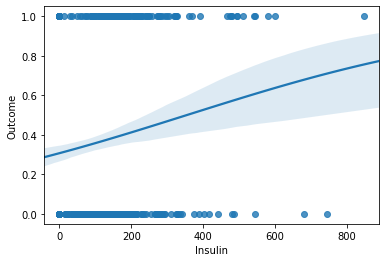

In [69]:
seaborn.regplot(x='Insulin', y='Outcome', data=df, logistic=True)

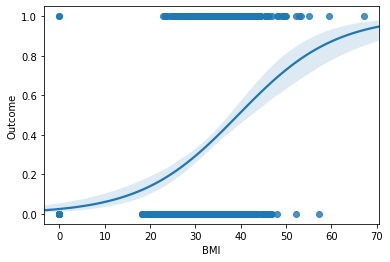

In [70]:
seaborn.regplot(x='BMI', y='Outcome', data=df, logistic=True)

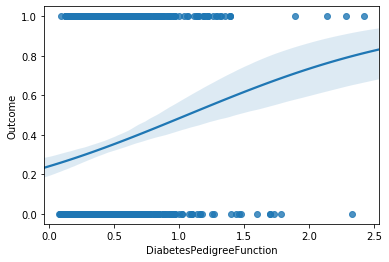

In [71]:
seaborn.regplot(x='DiabetesPedigreeFunction', y='Outcome', data=df, logistic=True)

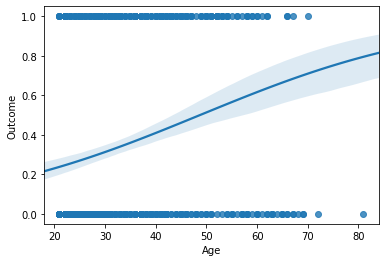

In [72]:
seaborn.regplot(x='Age', y='Outcome', data=df, logistic=True)

**Question 4** (25 points)

Which method is better used to predict diabetes: linear regression or logistic regression?

Substantiate your answer to this question as much as possible.

Answer: Logistic Regression would be more appropriate than linear regression, as we are predicting a binary response:
Outcome, which takes on a value of 1 if the patient has diabetes and 0 if not. Using all attributes as predictors of Outcome in a Logistic Regression Model, we obtain relatively high scores for accuracy, precision, and recall. 

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate

In [4]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [57]:
y = df['Outcome']
X = df[['Pregnancies', 'Glucose', 'BloodPressure','SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']]

In [58]:
model = LogisticRegression(solver = 'lbfgs', max_iter = 500)
model.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [59]:
r = cross_validate(model, X,y, cv = 10, scoring = ['precision', 'recall', 'accuracy'])
print('average accuracy', sum(r['test_accuracy'])/len(r['test_accuracy']))
print('average precision', sum(r['test_precision'])/len(r['test_precision']))
print('average recall', sum(r['test_recall'])/len(r['test_recall']))

average accuracy 0.7734791524265209
average precision 0.7283896804949437
average recall 0.5709401709401709
